## Load data

In [1]:
# load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
finalData = pd.read_csv('csv_housing_XGBoost_PriceLimit_2000_2022_not_normalized')
finalData

,Price,State,County,Time,Bedrooms,Year,Month
0,158704.158466,NY,Queens County,2000-01-31,1,2000,1
1,142042.736354,TX,Tarrant County,2000-01-31,3,2000,1
2,151032.122248,IA,Linn County,2000-01-31,3,2000,1
3,137097.551500,OH,Summit County,2000-01-31,3,2000,1
4,133334.515021,VT,Washington County,2000-01-31,3,2000,1
...,...,...,...,...,...,...,...
7776271,324835.405696,FL,Marion County,2022-12-31,3,2022,12
7776272,287029.753423,PA,Adams County,2022-12-31,3,2022,12
7776273,153940.746210,LA,Rapides Parish,2022-12-31,3,2022,12
7776274,237366.825163,SC,Orangeburg County,2022-12-31,3,2022,12


In [2]:
print(f"NaN values = {finalData.isna().any(axis=1).sum()}")

NaN values = 0


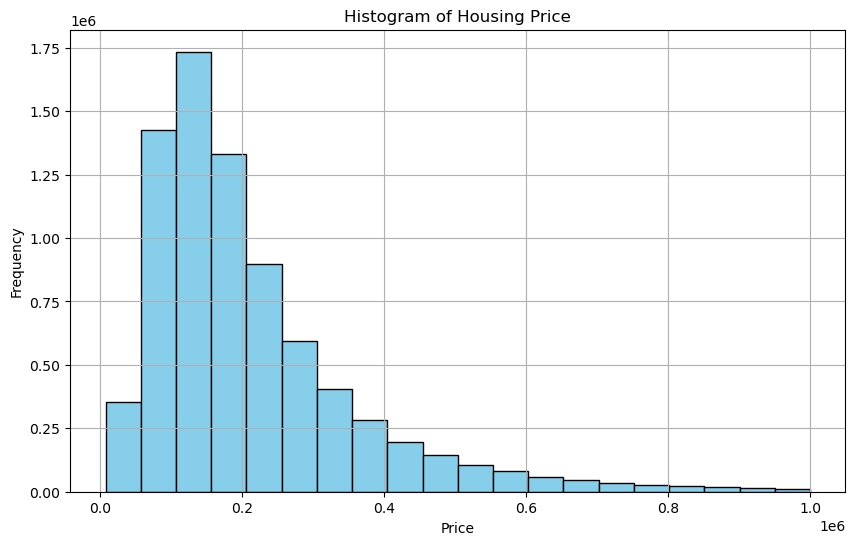

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(finalData['Price'], bins=20, color='skyblue', edgecolor='black') 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Price')
plt.grid(True)
plt.show()

# Normalize Price with MinMax Scaler (range 0 to 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Extract the 'Price' column as a 2D array
price_column = finalData[['Price']]

# Fit and transform the 'Price' column
price_scaled = scaler.fit_transform(price_column)

# Replace the original 'Price' column with the scaled values
finalData['Price'] = price_scaled
price_scaled

array([[0.15215395],
       [0.13536279],
       [0.14442217],
       ...,
       [0.14735344],
       [0.23142914],
       [0.11292649]])

## Binary Encode State and County

In [5]:
from category_encoders import BinaryEncoder
import joblib

# Initialize Binary Encoder
binary_encoder = joblib.load('/scratch/network/lg6248/housing-model/binary_encoder.pkl')

# Encode 'County' variable
encoded_data = binary_encoder.fit_transform(finalData)

print("*** ORIGINAL DATA WITH CATEGORICAL STATE AND COUNTY *** ")
print(finalData)

print("\n *** DATA WITH BINARY ENCODED STATE AND COUNTY *** ")
print(encoded_data) 

finalData = encoded_data.copy()

*** ORIGINAL DATA WITH CATEGORICAL STATE AND COUNTY *** 
            Price State             County        Time  Bedrooms  Year  Month
0        0.152154    NY      Queens County  2000-01-31         1  2000      1
1        0.135363    TX     Tarrant County  2000-01-31         3  2000      1
2        0.144422    IA        Linn County  2000-01-31         3  2000      1
3        0.130379    OH      Summit County  2000-01-31         3  2000      1
4        0.126587    VT  Washington County  2000-01-31         3  2000      1
...           ...   ...                ...         ...       ...   ...    ...
7776271  0.319579    FL      Marion County  2022-12-31         3  2022     12
7776272  0.281479    PA       Adams County  2022-12-31         3  2022     12
7776273  0.147353    LA     Rapides Parish  2022-12-31         3  2022     12
7776274  0.231429    SC  Orangeburg County  2022-12-31         3  2022     12
7776275  0.112926    KS      Barton County  2022-12-31         4  2022     12

[77762

# Load minmax data

In [6]:
# load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
finalData = pd.read_csv('csv_housing_XGBoost_PriceLimit_2000-2022_minmax_normalized')
finalData

,Price,State_0,State_1,State_2,State_3,State_4,State_5,County_0,County_1,County_2,...,County_5,County_6,County_7,County_8,County_9,County_10,Time,Bedrooms,Year,Month
0,0.152154,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2000-01-31,1,2000,1
1,0.135363,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,2000-01-31,3,2000,1
2,0.144422,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,2000-01-31,3,2000,1
3,0.130379,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,2000-01-31,3,2000,1
4,0.126587,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,2000-01-31,3,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776271,0.319579,0,1,0,0,1,0,0,0,1,...,1,1,0,0,0,1,2022-12-31,3,2022,12
7776272,0.281479,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,2022-12-31,3,2022,12
7776273,0.147353,1,0,1,0,1,0,0,0,1,...,1,1,1,1,1,0,2022-12-31,3,2022,12
7776274,0.231429,1,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,2022-12-31,3,2022,12


# Handle Outliers

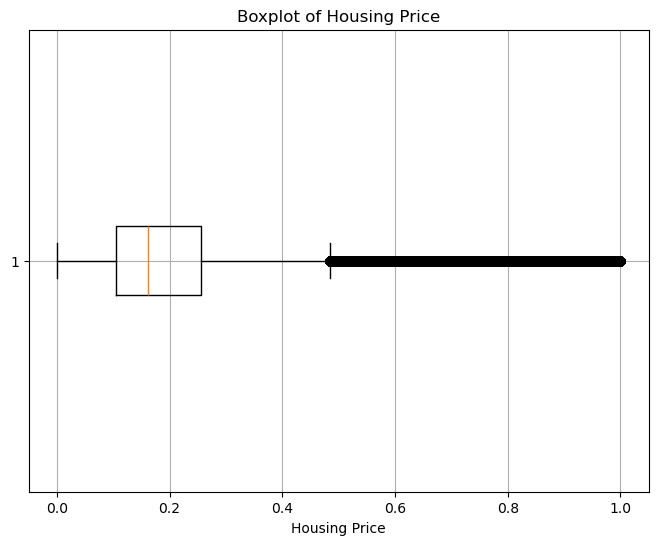

In [7]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(finalData['Price'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Housing Price')
plt.title('Boxplot of Housing Price')
plt.grid(True)
plt.show()

In [8]:
# Exclude higher values
finalData = finalData[(finalData['Price'] < 0.45)]
finalData

,Price,State_0,State_1,State_2,State_3,State_4,State_5,County_0,County_1,County_2,...,County_5,County_6,County_7,County_8,County_9,County_10,Time,Bedrooms,Year,Month
0,0.152154,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2000-01-31,1,2000,1
1,0.135363,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,2000-01-31,3,2000,1
2,0.144422,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,2000-01-31,3,2000,1
3,0.130379,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,2000-01-31,3,2000,1
4,0.126587,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,2000-01-31,3,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776271,0.319579,0,1,0,0,1,0,0,0,1,...,1,1,0,0,0,1,2022-12-31,3,2022,12
7776272,0.281479,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,2022-12-31,3,2022,12
7776273,0.147353,1,0,1,0,1,0,0,0,1,...,1,1,1,1,1,0,2022-12-31,3,2022,12
7776274,0.231429,1,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,2022-12-31,3,2022,12


In [9]:
finalData[finalData['Price'] == 0].count()

Price        1
State_0      1
State_1      1
State_2      1
State_3      1
State_4      1
State_5      1
County_0     1
County_1     1
County_2     1
County_3     1
County_4     1
County_5     1
County_6     1
County_7     1
County_8     1
County_9     1
County_10    1
Time         1
Bedrooms     1
Year         1
Month        1
dtype: int64

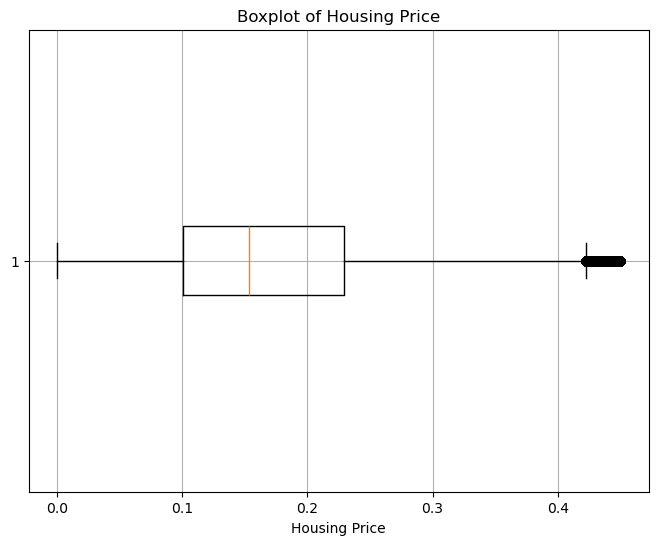

In [10]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(finalData['Price'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Housing Price')
plt.title('Boxplot of Housing Price')
plt.grid(True)
plt.show()

In [11]:
finalData[finalData['Price'] == 0].count()

Price        1
State_0      1
State_1      1
State_2      1
State_3      1
State_4      1
State_5      1
County_0     1
County_1     1
County_2     1
County_3     1
County_4     1
County_5     1
County_6     1
County_7     1
County_8     1
County_9     1
County_10    1
Time         1
Bedrooms     1
Year         1
Month        1
dtype: int64

In [12]:
finalData['Price'] = finalData[finalData['Price'] > 0].Price

/tmp/ipykernel_416695/531639457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['Price'] = finalData[finalData['Price'] > 0].Price


In [13]:
finalData[finalData['Price'] == 0].count()

Price        0
State_0      0
State_1      0
State_2      0
State_3      0
State_4      0
State_5      0
County_0     0
County_1     0
County_2     0
County_3     0
County_4     0
County_5     0
County_6     0
County_7     0
County_8     0
County_9     0
County_10    0
Time         0
Bedrooms     0
Year         0
Month        0
dtype: int64

In [14]:
finalData.isna().sum()

Price        1
State_0      0
State_1      0
State_2      0
State_3      0
State_4      0
State_5      0
County_0     0
County_1     0
County_2     0
County_3     0
County_4     0
County_5     0
County_6     0
County_7     0
County_8     0
County_9     0
County_10    0
Time         0
Bedrooms     0
Year         0
Month        0
dtype: int64

In [15]:
finalData.dropna(inplace = True)

/tmp/ipykernel_416695/2589099547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData.dropna(inplace = True)


In [16]:
finalData['Price'].skew()

0.7969193018100058

In [17]:
len(finalData)

7218247

In [18]:
finalData.describe()

,Price,State_0,State_1,State_2,State_3,State_4,State_5,County_0,County_1,County_2,...,County_4,County_5,County_6,County_7,County_8,County_9,County_10,Bedrooms,Year,Month
count,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,...,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06
mean,1.735455e-01,1.484381e-01,3.986857e-01,4.226336e-01,4.979814e-01,4.756641e-01,4.969560e-01,5.840559e-02,2.000469e-01,3.872994e-01,...,4.130754e-01,4.974263e-01,5.106809e-01,4.800427e-01,4.843779e-01,4.957788e-01,4.891038e-01,2.856556e+00,2.012455e+03,6.509603e+00
std,9.583208e-02,3.555338e-01,4.896279e-01,4.939782e-01,4.999960e-01,4.994074e-01,4.999908e-01,2.345088e-01,4.000352e-01,4.871331e-01,...,4.923862e-01,4.999934e-01,4.998859e-01,4.996016e-01,4.997559e-01,4.999822e-01,4.998813e-01,8.667049e-01,6.409010e+00,3.450363e+00
min,6.809452e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00
25%,1.007266e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.007000e+03,4.000000e+00
50%,1.530702e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.013000e+03,7.000000e+00
75%,2.295018e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.018000e+03,1.000000e+01
max,4.500000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.022000e+03,1.200000e+01


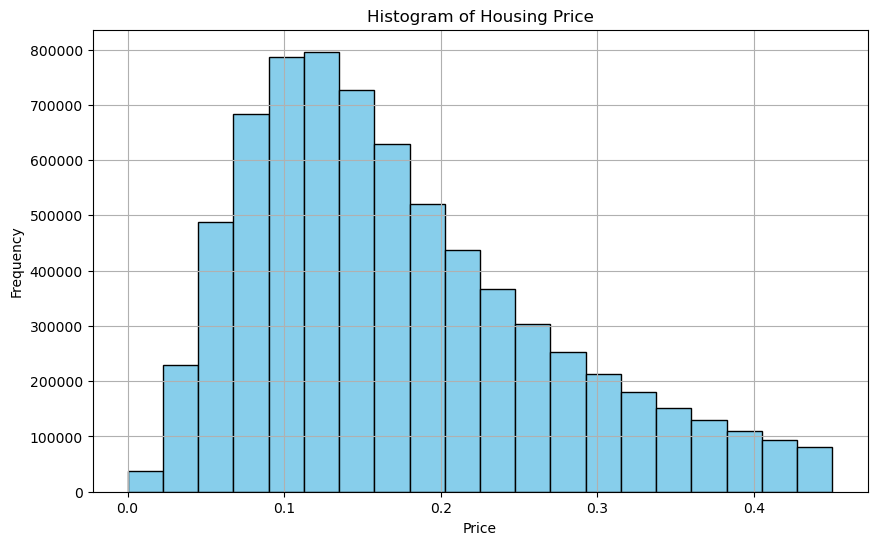

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(finalData['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Price')
plt.grid(True)
plt.show()

## Take log of price

In [20]:
import numpy as np
finalData['Price'] = np.log(finalData['Price'])

/tmp/ipykernel_416695/2758911948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalData['Price'] = np.log(finalData['Price'])


In [21]:
finalData['Price'].skew()

-0.5504154466673341

In [22]:
finalData.isna().sum()

Price        0
State_0      0
State_1      0
State_2      0
State_3      0
State_4      0
State_5      0
County_0     0
County_1     0
County_2     0
County_3     0
County_4     0
County_5     0
County_6     0
County_7     0
County_8     0
County_9     0
County_10    0
Time         0
Bedrooms     0
Year         0
Month        0
dtype: int64

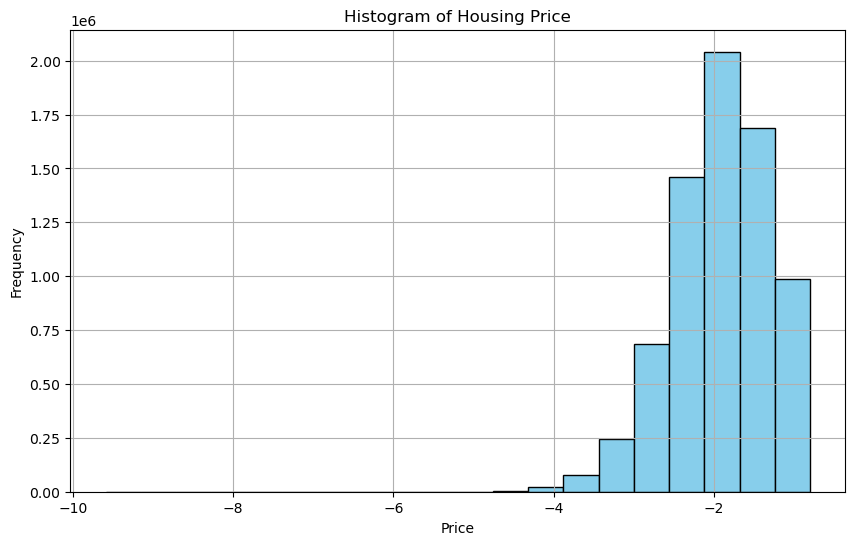

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histogram to see distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(finalData['Price'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Price')
plt.grid(True)
plt.show()

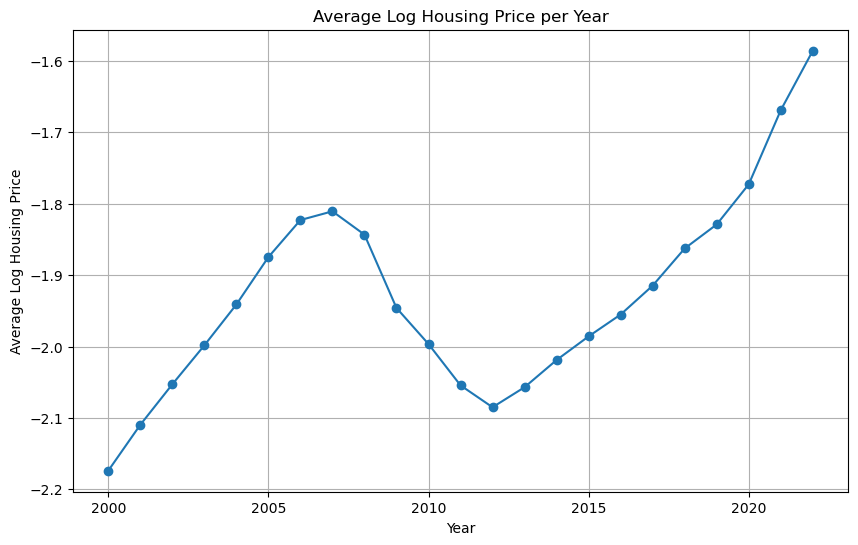

In [24]:
# Average housing price plot per year
price_by_year = finalData.groupby('Year')['Price'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Log Housing Price')
plt.title('Average Log Housing Price per Year')
plt.grid(True)
plt.show()

In [25]:
finalData.describe()

,Price,State_0,State_1,State_2,State_3,State_4,State_5,County_0,County_1,County_2,...,County_4,County_5,County_6,County_7,County_8,County_9,County_10,Bedrooms,Year,Month
count,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,...,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06,7.218247e+06
mean,-1.917022e+00,1.484381e-01,3.986857e-01,4.226336e-01,4.979814e-01,4.756641e-01,4.969560e-01,5.840559e-02,2.000469e-01,3.872994e-01,...,4.130754e-01,4.974263e-01,5.106809e-01,4.800427e-01,4.843779e-01,4.957788e-01,4.891038e-01,2.856556e+00,2.012455e+03,6.509603e+00
std,6.074127e-01,3.555338e-01,4.896279e-01,4.939782e-01,4.999960e-01,4.994074e-01,4.999908e-01,2.345088e-01,4.000352e-01,4.871331e-01,...,4.923862e-01,4.999934e-01,4.998859e-01,4.996016e-01,4.997559e-01,4.999822e-01,4.998813e-01,8.667049e-01,6.409010e+00,3.450363e+00
min,-9.594614e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00
25%,-2.295345e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.007000e+03,4.000000e+00
50%,-1.876859e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.013000e+03,7.000000e+00
75%,-1.471845e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.018000e+03,1.000000e+01
max,-7.985078e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.022000e+03,1.200000e+01


### Feature matrix and target vector, sorted by Time

In [26]:
# rearrange columns, such that target 'Price' is first and 'Time' is second.
columns = list(finalData.columns)
columns.remove('Time')
columns.remove('Price')
new_order = ['Price', 'Time'] + columns
finalData = finalData[new_order]

finalData = finalData.sort_values(by= 'Time')
finalData.reset_index(drop=True, inplace=True) 
finalData

,Price,Time,State_0,State_1,State_2,State_3,State_4,State_5,County_0,County_1,...,County_4,County_5,County_6,County_7,County_8,County_9,County_10,Bedrooms,Year,Month
0,-1.882862,2000-01-31,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,2000,1
1,-0.938259,2000-01-31,0,0,0,0,0,1,0,0,...,1,1,0,1,1,1,0,3,2000,1
2,-2.379114,2000-01-31,0,0,1,0,1,1,0,1,...,1,0,0,1,0,0,0,3,2000,1
3,-1.809073,2000-01-31,0,0,0,1,1,1,0,0,...,0,0,0,1,0,0,1,3,2000,1
4,-2.162671,2000-01-31,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,3,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218242,-1.409373,2022-12-31,0,0,1,1,0,0,0,0,...,1,0,1,1,0,0,0,3,2022,12
7218243,-2.108308,2022-12-31,0,0,1,1,1,1,0,1,...,1,0,1,0,1,1,1,3,2022,12
7218244,-1.400734,2022-12-31,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,0,3,2022,12
7218245,-1.699282,2022-12-31,1,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,3,2022,12


In [27]:
# get feature matrix (everything except Price and Time)
X = finalData.iloc[:, 2:]
print("--- FEATURE MATRIX --- ")
print(X, "\n")

print("--- PRICE COLUMN (TARGET) --- ")
y = finalData.iloc[:, 0]
print(y)

--- FEATURE MATRIX --- 
         State_0  State_1  State_2  State_3  State_4  State_5  County_0  \
0              0        0        0        0        0        1         0   
1              0        0        0        0        0        1         0   
2              0        0        1        0        1        1         0   
3              0        0        0        1        1        1         0   
4              0        0        1        0        0        0         0   
...          ...      ...      ...      ...      ...      ...       ...   
7218242        0        0        1        1        0        0         0   
7218243        0        0        1        1        1        1         0   
7218244        0        0        1        1        0        0         0   
7218245        1        1        0        0        0        0         0   
7218246        1        0        0        1        1        1         1   

         County_1  County_2  County_3  County_4  County_5  County_6  County

# Training and Evaluation: XGBoost for Regression


### Baseline

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate the mean of the target variable (housing prices)
baseline_prediction = np.mean(y)

# Create an array of baseline predictions with the same length as the true target values
baseline_predictions = np.full_like(y, baseline_prediction)

# Calculate metrics using the baseline predictions
baseline_mse = mean_squared_error(y, baseline_predictions)
baseline_absError = mean_absolute_error(y, baseline_predictions)
baseline_rsquared = r2_score(y, baseline_predictions)

print("Baseline Mean Squared Error (MSE):", baseline_mse)
print("Baseline Root Mean Squared Error (RMSE):", np.sqrt(baseline_mse))
print("Baseline Mean Absolute Error (MAE):", baseline_absError)
print("Baseline R-Squared Error (r2_score):", baseline_rsquared)

Baseline Mean Squared Error (MSE): 0.3689501204661574
Baseline Root Mean Squared Error (RMSE): 0.6074126443087577
Baseline Mean Absolute Error (MAE): 0.48397182172945286
Baseline R-Squared Error (r2_score): 0.0


In [29]:
backup = finalData.copy()

In [30]:
def baseline(y):
    # Calculate the mean of the target variable (housing prices)
    baseline_prediction = np.mean(y)
    
    # Create an array of baseline predictions with the same length as the true target values
    baseline_predictions = np.full_like(y, baseline_prediction)
    
    # Calculate metrics using the baseline predictions
    baseline_mse = mean_squared_error(y, baseline_predictions)
    baseline_absError = mean_absolute_error(y, baseline_predictions)
    baseline_rsquared = r2_score(y, baseline_predictions)
    
    print("Baseline MSE:", baseline_mse)
    print("Baseline R2:", baseline_rsquared)
    return(baseline_mse, baseline_rsquared)

### Function: plot_predicted_vs_true

In [31]:
import matplotlib.pyplot as plt

# Function to plot predicted vs. true values
def plot_predicted_vs_true(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    
    # Plot true values in blue
    plt.scatter(y_true, y_true, color='black', label='True Values')
    
    # Plot predicted values in green
    plt.scatter(y_pred, y_true, color='blue', label='Predicted Values')
    
    # Plot a diagonal line representing perfect predictions
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Perfect Predictions')
    
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.title('Predicted vs. True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
def plot_residuals_hist(true, y_pred):
    residuals = true - y_pred

    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, edgecolor = "white")
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

In [33]:
def plot_residuals(true, y_pred):
    residuals = true - y_pred

    # Plot residuals against predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

### Train_test_model

In [34]:
# adapted from: https://kili-technology.com/data-labeling/machine-learning/cross-validation-in-machine-learning#rolling-cross-validation-python-code-example

# Import necessary libraries
from xgboost import XGBRegressor 
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from typing import List, Dict, Union, Callable
from typing import Any

# Will train model on years before test_years, and evaluate predictions on test_years.
def train_test_model (
        test_years, 
        model: Any,
        X: np.ndarray,
        y: np.ndarray,
        metrics: Union[List[Callable], Callable] = mean_squared_error,
    ):
    """
    Perform rolling cross-validation on time-series data.

    Parameters:
    - test_years: years used to evaluate trained model's performance.
    - model: The machine learning model to use (should have fit and predict methods)
    - X: The feature matrix
    - y: The target vector
    - metrics: A metric or list of metrics to calculate

    """
    
    # If only a single metric is provided, put it in a list (otherwise, metrics is a Callable function, not a list -- causes issues)
    if callable(metrics):
        metrics = [metrics]

    # Initialize dictionary to hold metric results -- key is metric name and value an empty list.
    metric_results = {metric.__name__: [] for metric in metrics}

    # Train model on years before first test year
    train_index = finalData[finalData['Year'] < test_years[0]].index
    X_train, y_train = X[train_index], y[train_index]
    model.fit(X_train, y_train)
    
    true_values = np.empty(0)
    predicted_values = np.empty(0)
    baseline_mse = []
    baseline_r2 = []
    
    # Make predictions for future years
    for test_year in test_years:
        test_index = finalData[finalData['Year'] == test_year].index
        
        # Create train/test splits -- using array indexing to obtain rows in np.array X and y.
        X_test, y_test = X[test_index], y[test_index]

        # Make predictions on features of test subset.
        # verified - predict():  If the model is trained with early stopping, then best_iteration is used automatically.
        y_pred = model.predict(X_test)
        
        # Calculate and store metric(s) -- compare predictions with true output for housing price
        for metric in metrics:
            metric_value = metric((y_test), y_pred)
            metric_results[metric.__name__].append(metric_value)

        # save predictions and true values
        true_values = np.concatenate((true_values, y_test))
        predicted_values = np.concatenate((predicted_values, y_pred))
        
        # print year
        print(f"\n --- Year = {test_year} --- ")
        # print MSE of predictions and true values of current year    
        MSE = metric_results["mean_squared_error"][-1]
        print(f"MSE: {MSE}")

        # print r-squared of predictions of current year
        r_squared = metric_results["r2_score"][-1]
        print(f"r2 score: {r_squared}")

        b_mse, b_r2 = baseline(y_test) 
        baseline_mse.append(b_mse)
        baseline_r2.append(b_r2)

    # Make plots to visualize performance
    plot_predicted_vs_true(true_values, predicted_values)
    plot_residuals_hist(true_values, predicted_values)
    plot_residuals(true_values, predicted_values)

    print("--- Metric Results Across Folds: ----")
    print(metric_results)

    print(f"True values: {y_test}")
    print(f"Predictions: {y_pred}")

    # print mean MSE score of folds from cross validation
    avg_MSE_score = np.mean(metric_results['mean_squared_error'])
    print(f"Average MSE score: {avg_MSE_score}")

    # print mean r-squared score of folds from cross validation
    avg_rsquared_score = np.mean(metric_results['r2_score'])
    print(f"Average r2 score: {avg_rsquared_score}")

    # print average baseline scores
    baseline_mse = np.array(baseline_mse)
    baseline_r2 = np.array(baseline_r2)
    
    avg_baseline_mse = np.mean(baseline_mse)
    print(f"Average baseline MSE: {avg_baseline_mse}")

    avg_baseline_r2 = np.mean(baseline_r2)
    print(f"Average baseline r2: {avg_baseline_r2}")
    
    return (avg_MSE_score, avg_rsquared_score)

In [35]:
# check types of X and y
# Note: Series in Pandas refers to a single column of a DataFrame.
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Test on years

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

# Define metrics to be used for evaluation.
metrics = [mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score]

## Test on 2017


 --- Year = 2017 --- 
MSE: 0.2967257264484567
r2 score: 0.20421562574694174
Baseline MSE: 0.3728720191659586
Baseline R2: 0.0


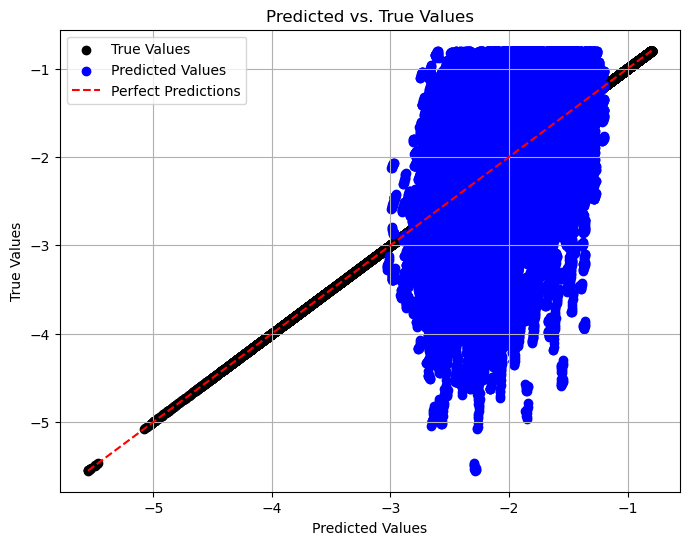

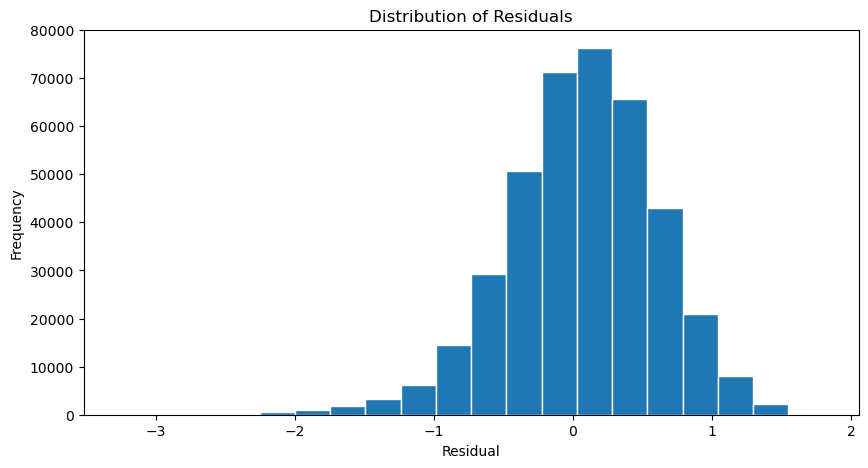

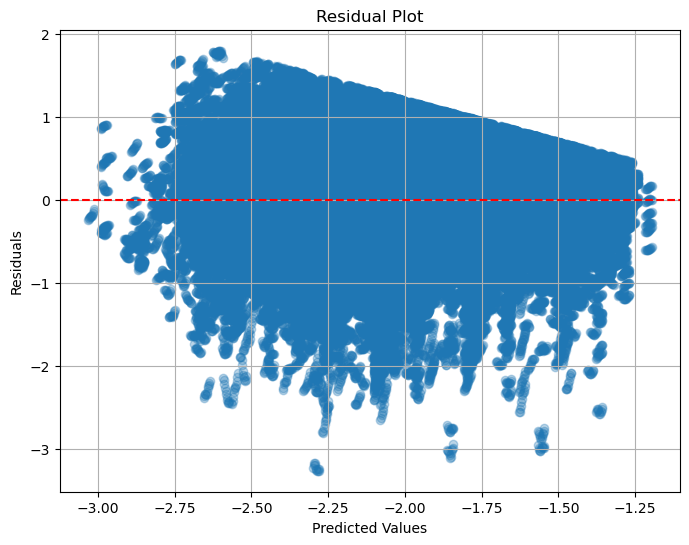

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.2967257264484567], 'root_mean_squared_error': [0.5447253679134622], 'mean_absolute_error': [0.4276608310803315], 'r2_score': [0.20421562574694174]}
True values: [-1.01521674 -1.63578805 -1.81066186 ... -1.59980681 -1.66835443
 -2.92831292]
Predictions: [-1.4342918  -1.78120253 -1.49760545 ... -1.80370567 -1.98112775
 -2.07938196]
Average MSE score: 0.2967257264484567
Average r2 score: 0.20421562574694174
Average baseline MSE: 0.3728720191659586
Average baseline r2: 0.0


In [37]:
test_years = [2017]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2018


 --- Year = 2018 --- 
MSE: 0.2911363889975604
r2 score: 0.1773528466393135
Baseline MSE: 0.35390189804730626
Baseline R2: 0.0


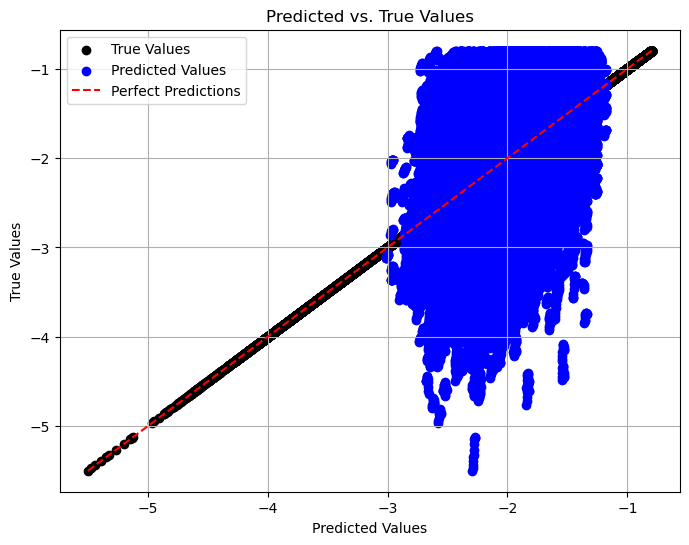

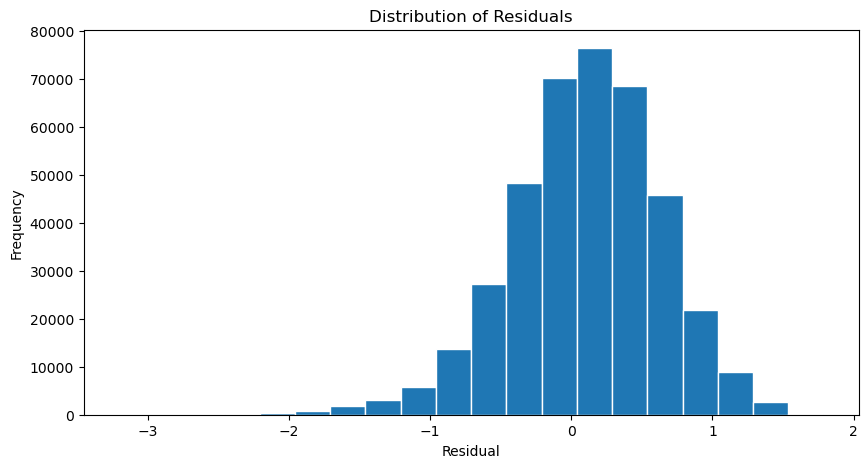

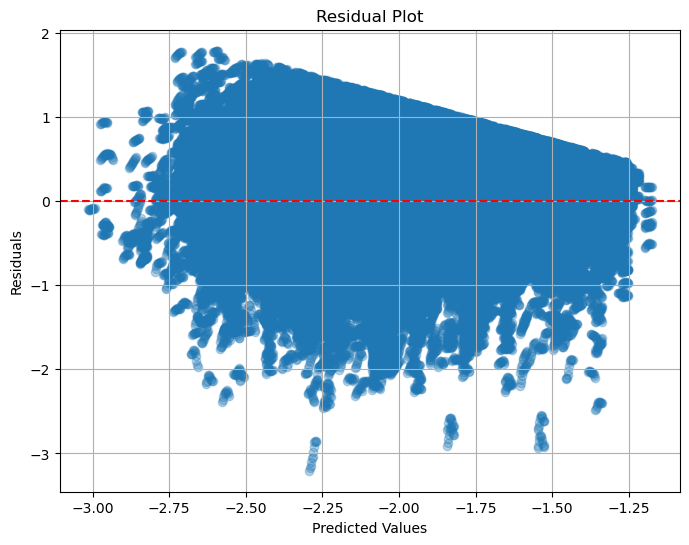

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.2911363889975604], 'root_mean_squared_error': [0.5395705597950655], 'mean_absolute_error': [0.4259737577066463], 'r2_score': [0.1773528466393135]}
True values: [-1.62744735 -1.10777363 -1.61249319 ... -0.92047064 -1.89402931
 -1.6055874 ]
Predictions: [-1.62868191 -1.73399774 -1.46243583 ... -1.7602297  -2.01439885
 -1.94895797]
Average MSE score: 0.2911363889975604
Average r2 score: 0.1773528466393135
Average baseline MSE: 0.35390189804730626
Average baseline r2: 0.0


In [38]:
test_years = [2018]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2019


 --- Year = 2019 --- 
MSE: 0.29052405610927134
r2 score: 0.15616643505670058
Baseline MSE: 0.3442907087119636
Baseline R2: 0.0


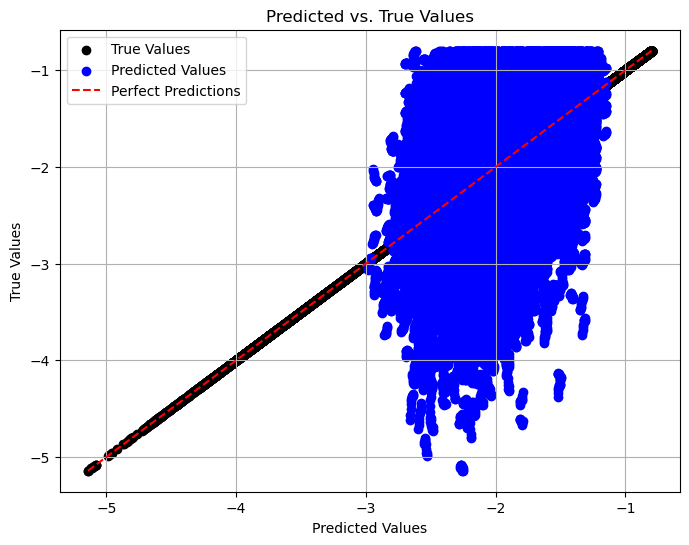

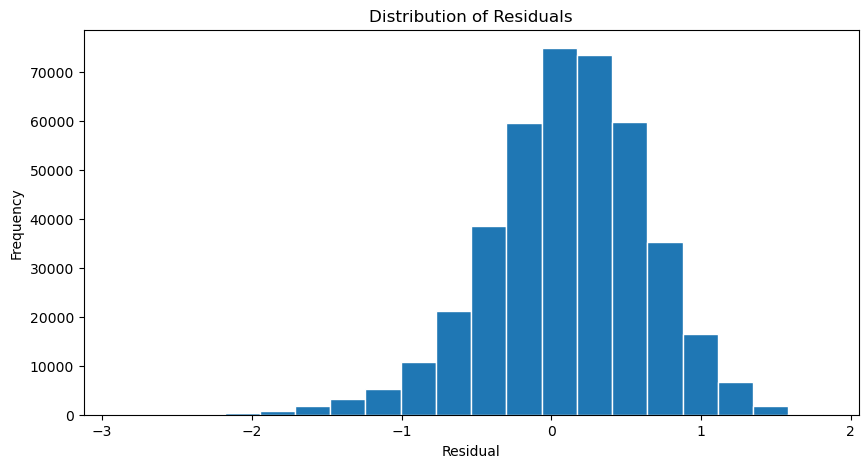

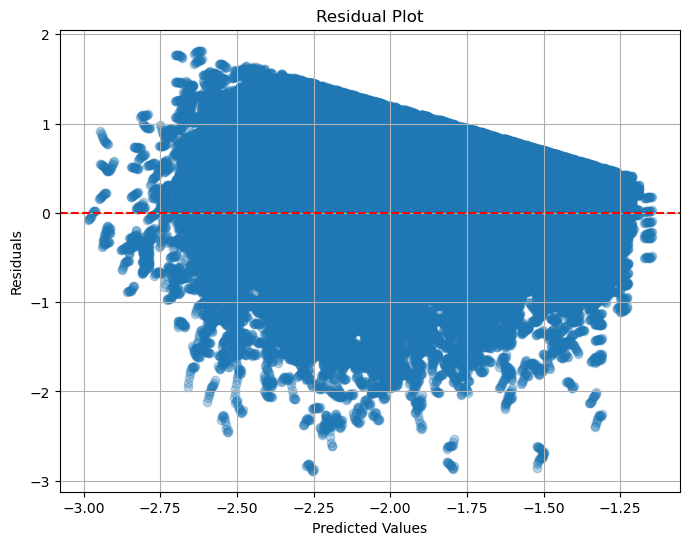

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.29052405610927134], 'root_mean_squared_error': [0.5390028349733157], 'mean_absolute_error': [0.42571854764680744], 'r2_score': [0.15616643505670058]}
True values: [-2.21673774 -1.36930117 -1.31379779 ... -1.48383151 -2.44772314
 -2.41450026]
Predictions: [-1.93056447 -1.72505228 -1.62626236 ... -1.74115235 -2.08064584
 -1.96647231]
Average MSE score: 0.29052405610927134
Average r2 score: 0.15616643505670058
Average baseline MSE: 0.3442907087119636
Average baseline r2: 0.0


In [39]:
test_years = [2019]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2020


 --- Year = 2020 --- 
MSE: 0.28315999989396123
r2 score: 0.12713300613297063
Baseline MSE: 0.3244022306760487
Baseline R2: 0.0


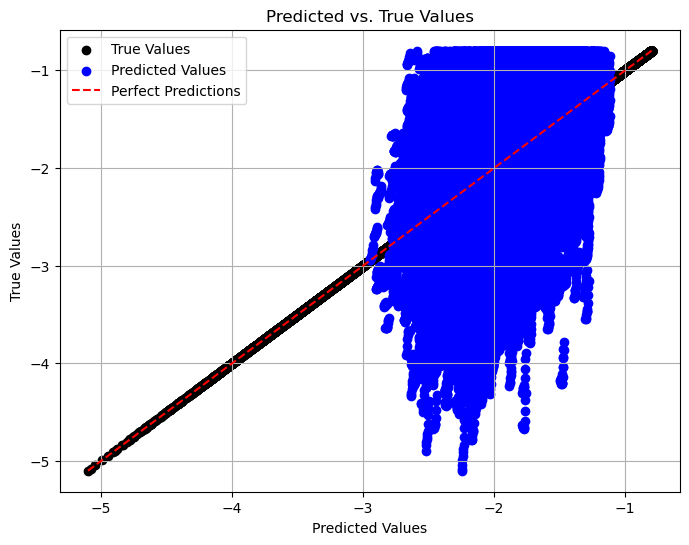

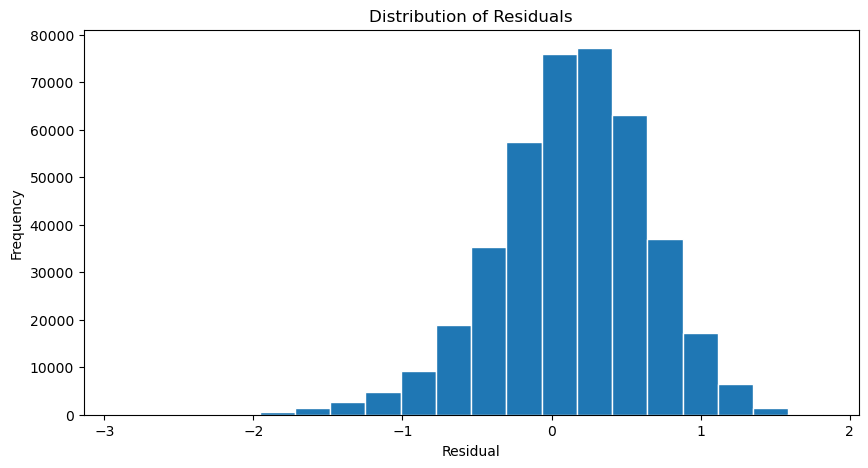

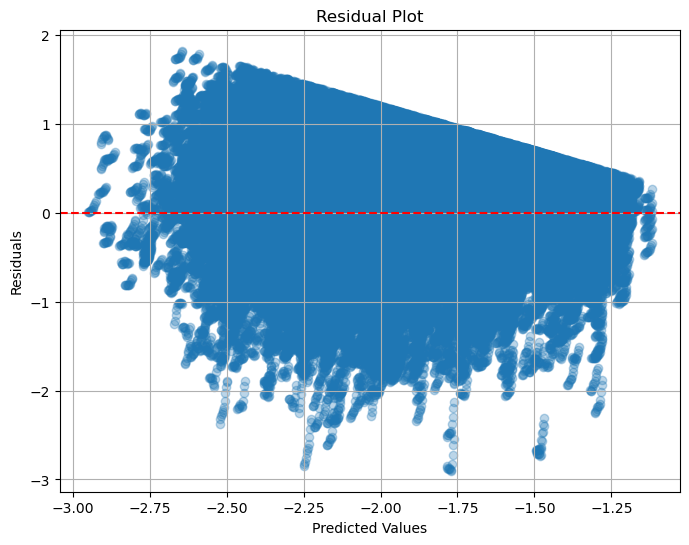

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.28315999989396123], 'root_mean_squared_error': [0.5321278040978137], 'mean_absolute_error': [0.4220910528814687], 'r2_score': [0.12713300613297063]}
True values: [-1.38139873 -0.95473047 -1.29700664 ... -1.75999183 -2.05001552
 -0.93846294]
Predictions: [-1.86395247 -1.63402343 -1.56273849 ... -2.1382405  -1.93514117
 -1.61452852]
Average MSE score: 0.28315999989396123
Average r2 score: 0.12713300613297063
Average baseline MSE: 0.3244022306760487
Average baseline r2: 0.0


In [40]:
test_years = [2020]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2021


 --- Year = 2021 --- 
MSE: 0.28487381292961494
r2 score: 0.016978461656694477
Baseline MSE: 0.2897940704429683
Baseline R2: 0.0


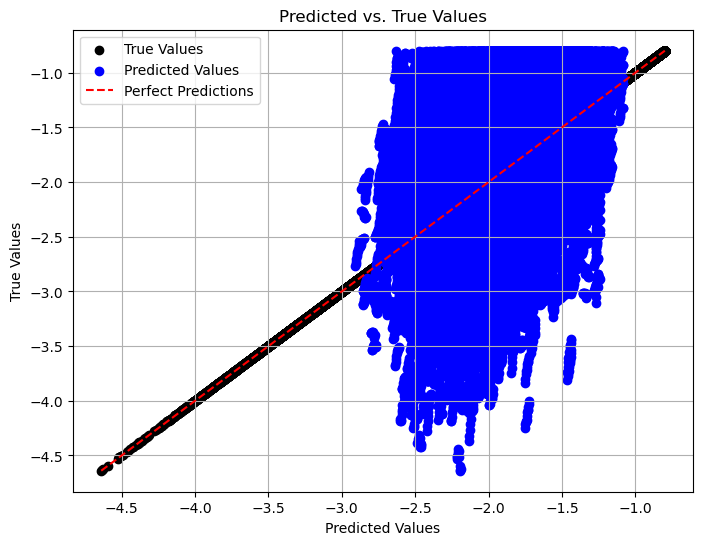

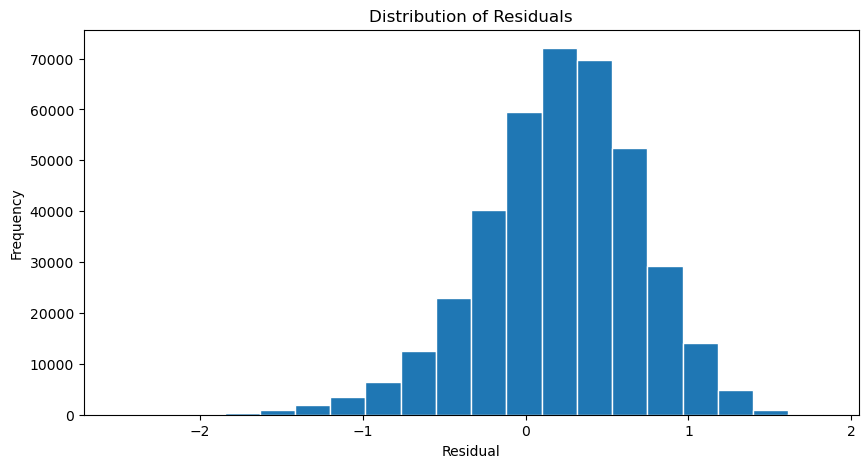

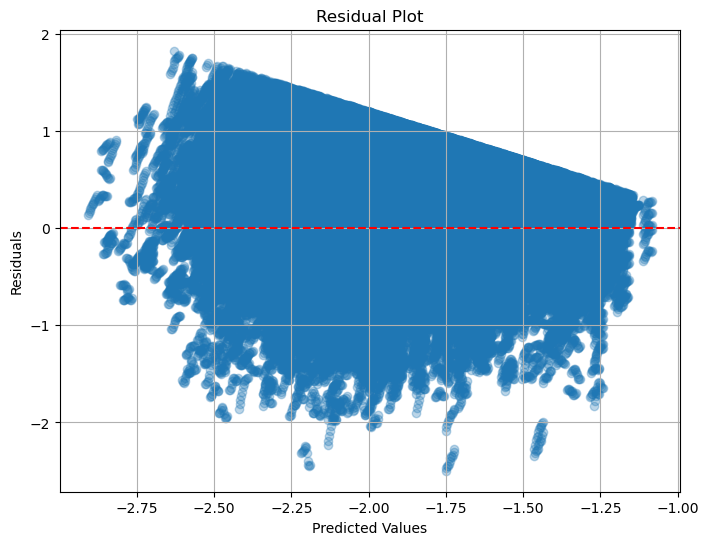

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.28487381292961494], 'root_mean_squared_error': [0.5337357144969923], 'mean_absolute_error': [0.4302871764063392], 'r2_score': [0.016978461656694477]}
True values: [-2.75412326 -3.30249569 -2.45708351 ... -2.11604855 -1.13836804
 -2.49559152]
Predictions: [-2.41547292 -2.19828349 -2.21984515 ... -2.18967938 -1.9890592
 -2.1266672 ]
Average MSE score: 0.28487381292961494
Average r2 score: 0.016978461656694477
Average baseline MSE: 0.2897940704429683
Average baseline r2: 0.0


In [41]:
test_years = [2021]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)


 --- Year = 2017 --- 
MSE: 0.2967257264484567
r2 score: 0.20421562574694174
Baseline MSE: 0.3728720191659586
Baseline R2: 0.0

 --- Year = 2018 --- 
MSE: 0.29545280471204305
r2 score: 0.1651562019242131
Baseline MSE: 0.35390189804730626
Baseline R2: 0.0

 --- Year = 2019 --- 
MSE: 0.3028779013953802
r2 score: 0.12028441740851548
Baseline MSE: 0.3442907087119636
Baseline R2: 0.0

 --- Year = 2020 --- 
MSE: 0.30947196258928333
r2 score: 0.046023937799844705
Baseline MSE: 0.3244022306760487
Baseline R2: 0.0

 --- Year = 2021 --- 
MSE: 0.34376799102322886
r2 score: -0.1862492234494586
Baseline MSE: 0.2897940704429683
Baseline R2: 0.0


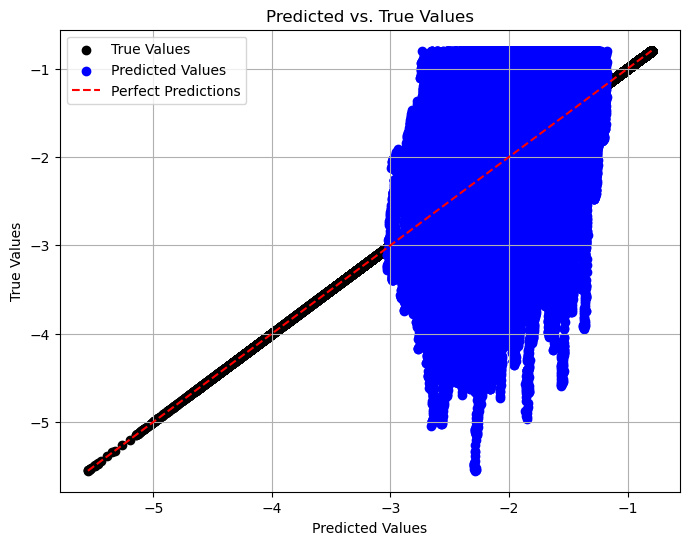

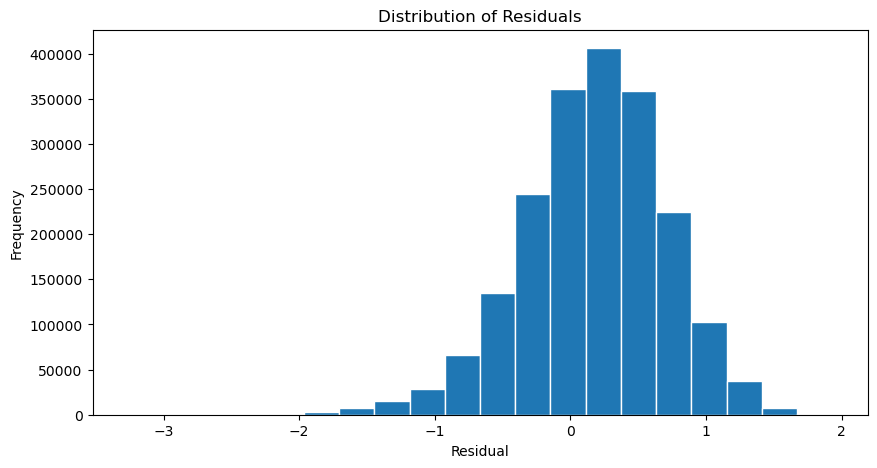

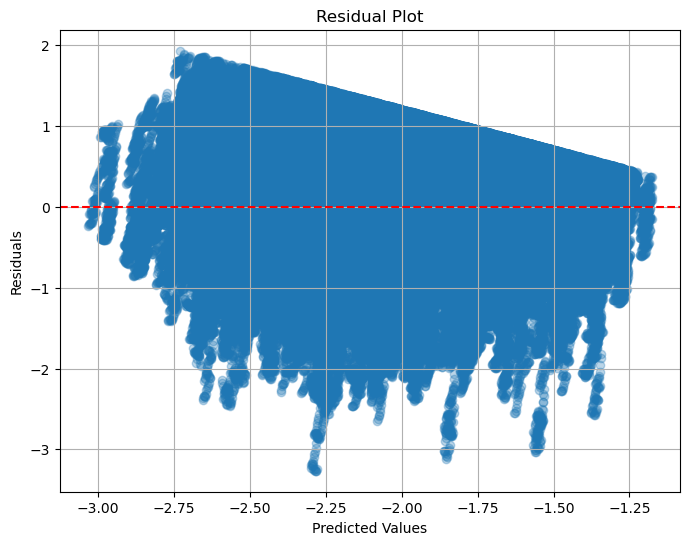

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.2967257264484567, 0.29545280471204305, 0.3028779013953802, 0.30947196258928333, 0.34376799102322886], 'root_mean_squared_error': [0.5447253679134622, 0.5435557052520404, 0.5503434394951757, 0.5563020425895301, 0.5863173125733444], 'mean_absolute_error': [0.4276608310803315, 0.4299056134063778, 0.43701904032483263, 0.4457995669953348, 0.48078892774176674], 'r2_score': [0.20421562574694174, 0.1651562019242131, 0.12028441740851548, 0.046023937799844705, -0.1862492234494586]}
True values: [-2.75412326 -3.30249569 -2.45708351 ... -2.11604855 -1.13836804
 -2.49559152]
Predictions: [-2.5395654  -2.31151127 -2.35853119 ... -2.30588217 -2.1009845
 -2.27882196]
Average MSE score: 0.3096592772336784
Average r2 score: 0.06988619188601128
Average baseline MSE: 0.337052185408849
Average baseline r2: 0.0


In [43]:
test_years = [2017, 2018, 2019, 2020, 2021]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)

## Test on 2018-2021


 --- Year = 2018 --- 
MSE: 0.2911363889975604
r2 score: 0.1773528466393135
Baseline MSE: 0.35390189804730626
Baseline R2: 0.0

 --- Year = 2019 --- 
MSE: 0.29699375626825053
r2 score: 0.1373750474436477
Baseline MSE: 0.3442907087119636
Baseline R2: 0.0

 --- Year = 2020 --- 
MSE: 0.3010195862649893
r2 score: 0.07207917270584208
Baseline MSE: 0.3244022306760487
Baseline R2: 0.0

 --- Year = 2021 --- 
MSE: 0.3300155362120089
r2 score: -0.13879326691384541
Baseline MSE: 0.2897940704429683
Baseline R2: 0.0


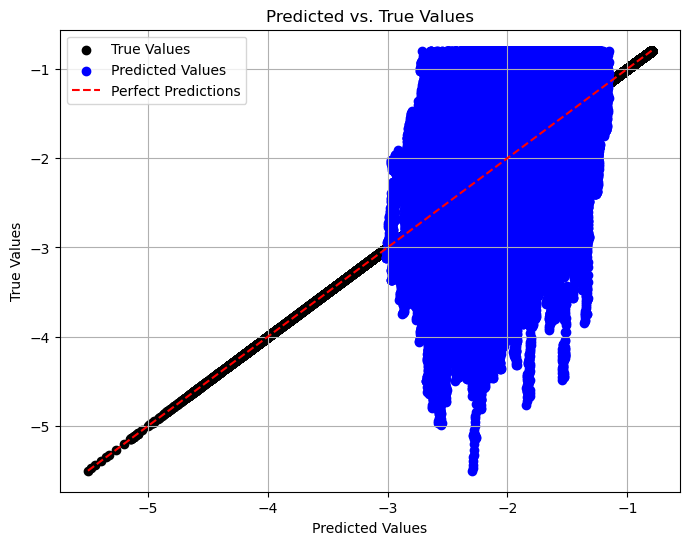

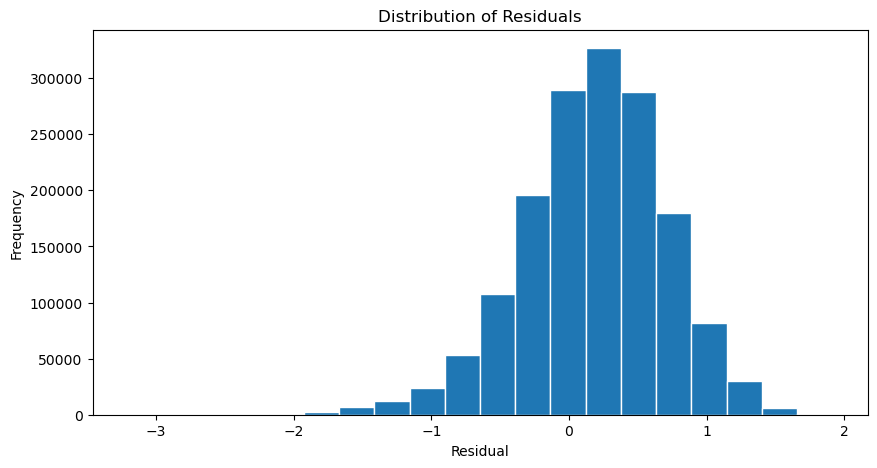

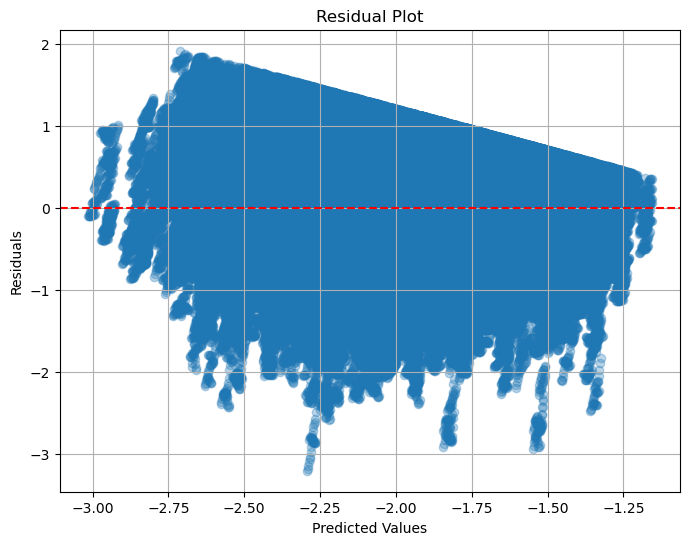

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.2911363889975604, 0.29699375626825053, 0.3010195862649893, 0.3300155362120089], 'root_mean_squared_error': [0.5395705597950655, 0.5449713352720953, 0.5486525186900989, 0.574469787031493], 'mean_absolute_error': [0.4259737577066463, 0.43172159595311504, 0.43834313701069394, 0.46932056902411035], 'r2_score': [0.1773528466393135, 0.1373750474436477, 0.07207917270584208, -0.13879326691384541]}
True values: [-2.75412326 -3.30249569 -2.45708351 ... -2.11604855 -1.13836804
 -2.49559152]
Predictions: [-2.51374446 -2.288729   -2.32994679 ... -2.2819788  -2.07984472
 -2.24759687]
Average MSE score: 0.3047913169357023
Average r2 score: 0.062003449968739466
Average baseline MSE: 0.3280972269695717
Average baseline r2: 0.0


In [44]:
test_years = [2018, 2019, 2020, 2021]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)


 --- Year = 2022 --- 
MSE: 0.29009988685340893
r2 score: -0.08692923897216431
Baseline MSE: 0.266898595098736
Baseline R2: 0.0


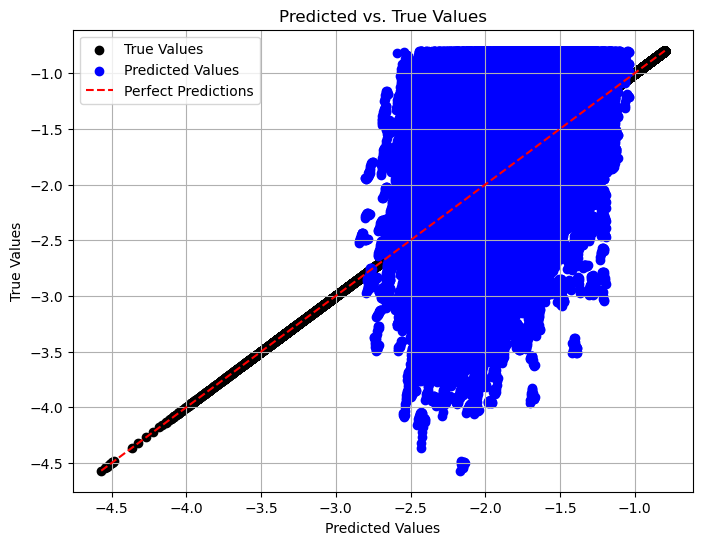

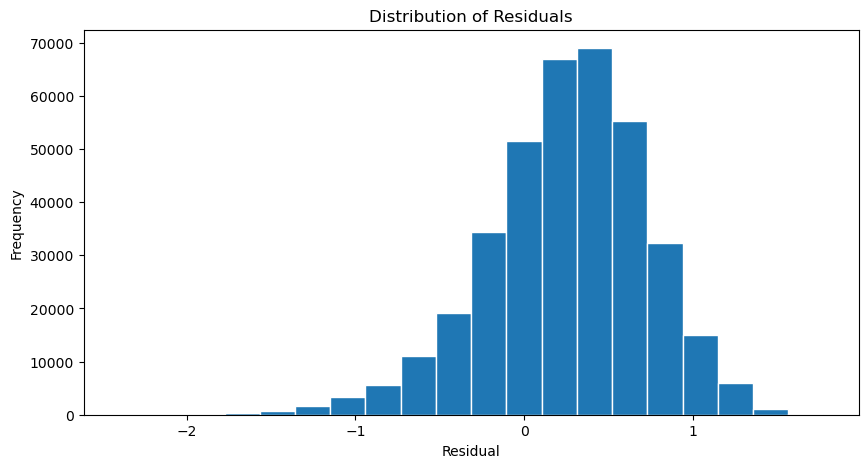

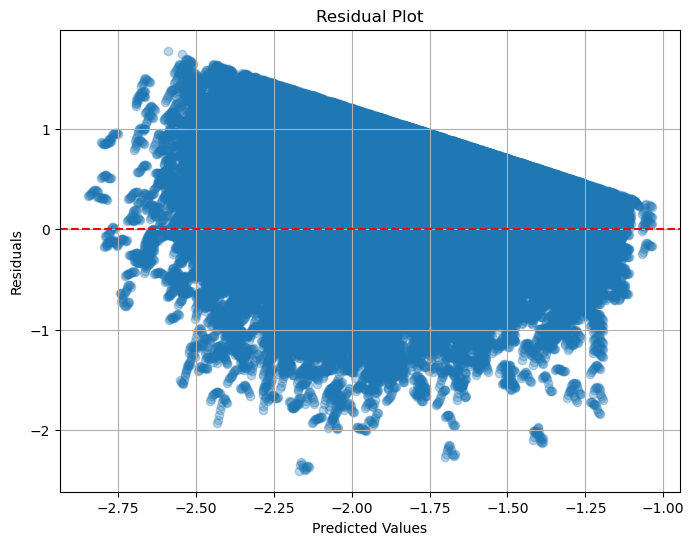

--- Metric Results Across Folds: ----
{'mean_squared_error': [0.29009988685340893], 'root_mean_squared_error': [0.5386092153439346], 'mean_absolute_error': [0.4396213671470927], 'r2_score': [-0.08692923897216431]}
True values: [-2.4078698  -1.44986662 -1.41982028 ... -1.40073402 -1.69928196
 -2.18101816]
Predictions: [-1.70316191 -1.6929345  -1.63764288 ... -1.83211915 -1.81434206
 -1.65485351]
Average MSE score: 0.29009988685340893
Average r2 score: -0.08692923897216431
Average baseline MSE: 0.266898595098736
Average baseline r2: 0.0


In [183]:
test_years = [2022]
results = train_test_model(test_years, LinearRegression(), X.values, y.values, metrics = metrics)